<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/comments_abr23_Regresion_covidCSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wget
import wget
import pandas as pd
#datos covid19 - mundo
#url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
#datos Colombia
#url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"
#wget.download(url, 'covid.csv')
Xd = pd.read_csv('covid.csv')
Xd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Saint Pierre and Miquelon,France,46.885200,-56.315900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
260,NaN,South Sudan,6.877000,31.307000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4,4,4,4,4,4,4,4,4,4,4
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


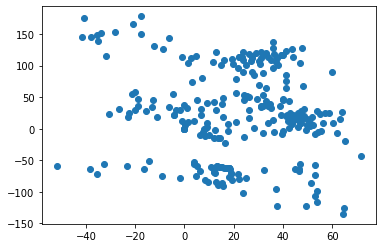

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(Xd['Lat'],Xd['Long'])

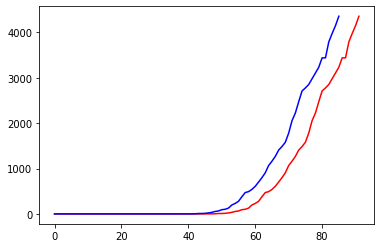

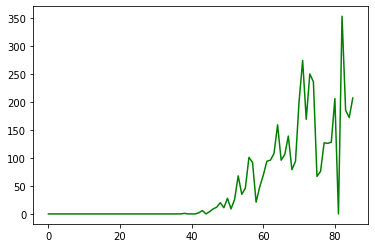

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#funcion ventaneo
def covid_win(serie,w=5):
    pi =0
    pf = w
    X = serie[pi:pf].reshape(1,-1)
    y = serie[pf+1].reshape(1,-1)
    pi += 1
    pf+= 1
    while pf+1 < serie.shape[0]:
      X = np.append(X,serie[pi:pf].reshape(1,-1),axis=0)
      y = np.append(y,serie[pf+1].reshape(1,-1),axis=0)
      pi += 1
      pf+=1
    return X, y # X \in Real^{N x P = w}, y \in Real^N


ii = Xd[Xd.columns[1]] == 'Colombia'
#print(np.where(ii)[0][0])
#contagios  acumulados
serie = np.array(Xd.iloc[np.where(ii)[0][0],4:])
#numero contagiados por dia
serie_d = np.append(0,np.diff(serie))
#serie_d = np.append(0,np.cumsum(np.diff(serie)))
X,y = covid_win(serie,w=5)
X_d,y_d = covid_win(serie_d,w=5)

plt.plot(serie,'r')
plt.plot(y,'b')
plt.show()
plt.plot(y_d,'g')



# Entrenamiento de regresor para covid 19 - Colombia
# Análisis exploratorio - visualización en 2D PCA
# Validación cruzada y anidada (pocos datos)

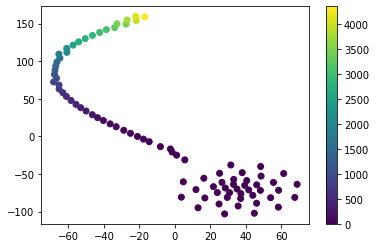

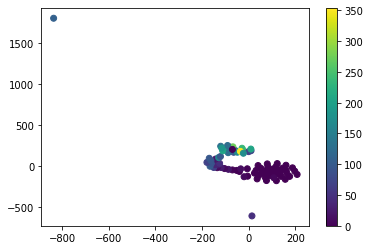

In [42]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

red = TSNE(n_components = 2,perplexity=5) #transform no esta en tsne
red_d = TSNE(n_components = 2,perplexity=5)

#red = PCA()
#red_d = PCA()


z = red.fit_transform(X)
z_d = red_d.fit_transform(X_d)

plt.scatter(z[:,0],z[:,1],c=y)
plt.colorbar()
plt.show()


plt.scatter(z_d[:,0],z_d[:,1],c=y_d)
plt.colorbar()
plt.show()


In [16]:
red_d.explained_variance_ratio_

array([0.79948503, 0.0756895 , 0.06182384, 0.04139623, 0.02160539])

In [27]:
X

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0,

$$w^* = (\Phi^\top \Phi + \lambda I)^{-1}\Phi^\top y $$

$$y_n = \phi_n w^*$$


$\lambda$: hyperparameter

$\Phi(x)=\mathcal{N}(x|\mu,\sigma^2)$

$\mu,\sigma$ hyperparameters

$w$: model's parameter

In [6]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
#pocos datos y mucha incertidumbre, validación cruzada anidada

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

#gridsearch (Xtrain,ytrain) #validacion cruzada muchos datos mas de 1000, 10000
#evalua una vez sobre Xtest
#y_test_e = gridsearch.best_model_.predict(Xtest)
#score(ytest,ytest_e)

print(X_train.shape)
print(X_test.shape)

(60, 5)
(26, 5)


In [0]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from joblib import dump, load
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as mse
#
steps = [
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('reg',  KernelRidge(kernel = 'rbf'))], #clasificador 
         [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', KernelRidge(kernel = 'rbf'))], #clasificador 
         
             [('scaler', StandardScaler()), #estandarizar cada atriuto columna de xtrain centrada en 0 y var = 1
          ('rep', PCA()),
          ('reg', ElasticNet())],
         ]        


#parametros a buscar por busqueda por grilla
parameters =[
             {'reg__gamma':[1e-3,1e-2,1e-1,1,10,100],
             'reg__alpha':[1e-3,1e-2,1e-1,1,10,100]
             },
             {'reg__gamma':[1e-3,1e-2,1e-1,1,10,100],
             'reg__alpha':[1e-3,1e-2,1e-1,1,10,100],
              'rep__n_components':[0.5,0.75,0.9]
             },


              ]

label_model = ['NorSC-KRRBF','NorSC-PCA-KRRBF','NorSC-PCA-EN']


In [28]:
#valildacion cruzada anidada
Niter = 10 #numero particiones outter loop nested cross-validation
msev =np.zeros((Niter,len(steps)))#arreglo para guardar acierto
best_estimators = []#mejor metodo por iteracion
###clave del funcionamiento
best_hyperpar = []#mejor metodo por iteracion 
#############################
          

for j in range(Niter): #outter loop - anidada prueba varias validaciones cruzadas no una sola xtest
      print('it %d/%d'%(j+1,Niter))
      #particiono datos outter loop
      X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # xtrain 60, xtest 26
      for r in range(len(steps)): #recorro todos los posibles modelos a probar en iteracion j del outter loop
          grid_search = GridSearchCV(Pipeline(steps[r]), parameters[r],cv=5,verbose=10,scoring='neg_mean_absolute_error',n_jobs=5) #cv inner loop
          #xtrain gridsearchcv xtrain split en 12 / cv, 60/5 = 12, xtrain 48 datos validar 12
          # cv = N -> leave one out N <30
          #generar mejor modelo
          grid_search.fit(X_train,y_train)
          #estimar salida conjunto de test
          y_pred = grid_search.best_estimator_.predict(X_test)
          #guardar mejor modelo
          best_estimators.append(grid_search.best_estimator_)
          best_hyperpar.append(grid_search.best_params_)
          
          #guardar acierto
          msev[j,r] = mse(y_test,y_pred)
          print('it %d/%d-Modelo %d/%d'%(j+1,Niter,r,len(steps)))
          print(best_hyperpar)
          print('mse:',msev[j,r])
          
          savedata = {
              'acc':msev,
              'best_models':best_estimators,
              'best_parameters':best_hyperpar,
                } 
          dump(savedata,'covid19_1.joblib')

it 1/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:    2.0s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1742s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    2.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0332s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  45 tasks      | elapsed:    2.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0950s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  79 tasks      | elapsed:    2.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1014s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 152 out of 180 | elapsed:    2.5s remaining:    0.5s
[Parallel(n_jobs=5)]: Done 171 out of 180 | elapsed:    2.5s remaining:    0.1s
[Parallel

it 1/10-Modelo 0/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}]
mse: 2088.2356860247546
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0630s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0664s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1050s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 427 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 470 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 498 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 513 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 528 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]:

it 1/10-Modelo 1/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}]
mse: 1979.032032309449
it 2/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0812s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 126 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 142 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 153 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 164 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0109s.) Setting batch_size=2.


it 2/10-Modelo 0/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}]
mse: 2715.5885022881
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0378s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0726s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1420s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 442 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 470 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 498 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 513 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 528 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]:

it 2/10-Modelo 1/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}]
mse: 2230.9945149983114
it 3/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0694s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 111 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 141 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 163 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0090s.) Setting batch_size=2.


it 3/10-Modelo 0/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}]
mse: 1959.9054653721546
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0479s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0742s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1518s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  86 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 166 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1808s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 343 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 354 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 398 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 473 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 519 tasks      | elapsed:    1.8s

it 3/10-Modelo 1/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}]
mse: 779.4560497024003
it 4/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0718s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 134 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 143 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 165 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0153s.) Setting batch_size=2.


it 4/10-Modelo 0/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}]
mse: 1286.8188188126721
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0501s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0607s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1271s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1956s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 353 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 490 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 503 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 518 tasks      | elapsed:    1.7s

it 4/10-Modelo 1/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}]
mse: 1345.6907108354644
it 5/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0127s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0351s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0553s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0936s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.5s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Do

it 5/10-Modelo 0/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}]
mse: 1935.8445812400848
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1441s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  94 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1776s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 182 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1924s.) Setting batch_size=64.
[Parallel(n_jobs=5)]: Done 344 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 430 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 443 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 489 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    1.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0123s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computat

it 5/10-Modelo 1/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}]
mse: 1585.2356584343627
it 6/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0766s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  90 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 127 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 143 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 154 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 165 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0224s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0404s.) Setting batch_size=4.


it 6/10-Modelo 0/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}]
mse: 2082.225324951756
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0853s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1388s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1411s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 342 tasks      | elapsed:    1.4s
[Parallel(n_jobs=5)]: Done 384 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 459 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 503 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 518 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    1.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 6/10-Modelo 1/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}]
mse: 1261.4349363234337
it 7/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0104s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0104s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0608s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1158s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  82 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 133 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 142 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 153 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 164 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with

it 7/10-Modelo 0/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}]
mse: 2116.292875703025
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0558s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  30 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1352s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  66 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 146 tasks      | elapsed:    0.6s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1492s.) Setting batch_size=32.
[Parallel(n_jobs=5)]: Done 290 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 363 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 374 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 449 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 462 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 508 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 523 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    1.9s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent worker

it 7/10-Modelo 1/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}]
mse: 1535.391993279454
it 8/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Batch computation too fast (0.0503s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0662s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1304s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 129 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 161 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0168s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0628s.) Setting batch_size=4.
[Parallel(n_jobs=

it 8/10-Modelo 0/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}]
mse: 4169.579820492343
Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0921s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.2s
[Parallel(n_jobs=5)]: Done 427 tasks      | elapsed:    1.5s
[Parallel(n_jobs=5)]: Done 455 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 498 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 513 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 528 tasks      | elapsed:    1.8s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    1.8s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0143s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0143s.) Setting batch_size=4

it 8/10-Modelo 1/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}]
mse: 2173.510596383456
it 9/10
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1033s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 125 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 141 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 163 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


it 9/10-Modelo 0/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}]
mse: 2321.6853099748605
Fitting 5 folds for each of 108 ca

[Parallel(n_jobs=5)]: Batch computation too fast (0.0321s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0590s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0600s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.1029s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.7s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 412 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 470 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 498 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 513 tasks      | elapsed:    1.8s


it 9/10-Modelo 1/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_component

[Parallel(n_jobs=5)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0943s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done  74 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done 125 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 141 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 163 tasks      | elapsed:    0.5s
[Parallel(n_jobs=5)]: Done 180 out of 180 | elapsed:    0.6s finished


it 10/10-Modelo 0/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_componen

[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Batch computation too fast (0.0208s.) Setting batch_size=2.
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0454s.) Setting batch_size=4.
[Parallel(n_jobs=5)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0864s.) Setting batch_size=8.
[Parallel(n_jobs=5)]: Done  38 tasks      | elapsed:    0.3s
[Parallel(n_jobs=5)]: Done  78 tasks      | elapsed:    0.4s
[Parallel(n_jobs=5)]: Batch computation too fast (0.0940s.) Setting batch_size=16.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 326 tasks      | elapsed:    1.3s
[Parallel(n_jobs=5)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=5)]: Done 470 tasks      | elapsed:    1.7s
[Parallel(n_jobs=5)]: Done 498 tasks      | ela

it 10/10-Modelo 1/2
[{'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5}, {'reg__alpha': 0.001, 'reg__gamma': 0.1}, {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_componen

[Parallel(n_jobs=5)]: Done 528 tasks      | elapsed:    1.9s
[Parallel(n_jobs=5)]: Done 540 out of 540 | elapsed:    1.9s finished


Por Niter de outter loop tengo valores de los hyperparameters

$$\gamma = [0.01,0.1,10,1000,10000,0.01]$$

$$\gamma = [0.01,0.01,0.01,0.1,1,0.01]$$

$$\gamma^* = moda/mediana(\gamma_i) = 0.01$$

Toma todos los datos los N = 85, entreno sobre todo el conjunto con los parametros encontrados utilizando validación cruzada anidad

$$\theta^*/w^* =f(X|\gamma^*)$$

$$ y_{new} = f(x_{new}|\gamma^*,\theta^*/w^*)$$

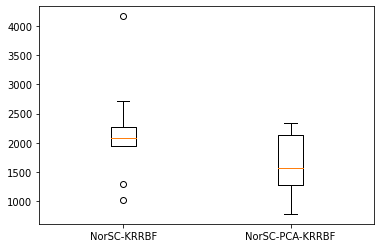

array([[2088.23568602, 1979.03203231],
       [2715.58850229, 2230.994515  ],
       [1959.90546537,  779.4560497 ],
       [1286.81881881, 1345.69071084],
       [1935.84458124, 1585.23565843],
       [2082.22532495, 1261.43493632],
       [2116.2928757 , 1535.39199328],
       [4169.57982049, 2173.51059638],
       [2321.68530997, 2346.64217598],
       [1014.62578559,  912.43521883]])

In [29]:
plt.boxplot(msev)
plt.xticks(ticks=np.arange(len(steps))+1,labels=label_model)
plt.show()
msev

In [30]:
best_hyperpar

[{'reg__alpha': 0.001, 'reg__gamma': 0.1},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components': 0.5},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1},
 {'reg__alpha': 0.001, 'reg__gamma': 0.1, 'rep__n_components'

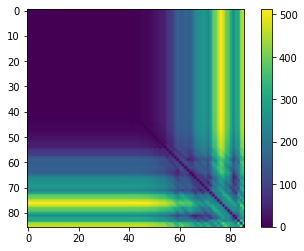

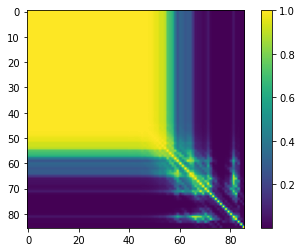

In [40]:
from sklearn.metrics import pairwise_distances as dist

D = dist(X_d,X_d)
plt.imshow(D)
plt.colorbar()
plt.show()
#kernel  rbf
gamma = 1e-4
K = np.exp(-.5*gamma*D**2)
plt.imshow(K)
plt.colorbar()
plt.show()


Hyperparametros ganadores por modelo
Entrenan cada modelo sobre toda la base de datos

Cuantos contagiados vamos a tener mañana abr 24?

$$NorSC-KRRBF: \gamma=xxx, \alpha=XXX$$

pipeline =[SC, KR(rbf, gamma=xxx, alpha=xxx)]

model23abrSCKRRBF= fit(X,y) #sobre todos los datos con hyperparametros moda del outter loop 

y23abr = model23abrSCKRRBF.predict(X[-1])

$$y_{new} = x_{new} W_{pca}$$

$$W_{tsne}=?$$